In [40]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

ufo_data = pd.read_excel('scrubbed.xlsx')

In [41]:
ufo_data.sample(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
19427,12/21/2003 20:00,shannon,ms,us,light,18000,4-5hrs,2 objects w/Red green/blue white light in sky ...,1/17/2004,34.116111,-88.711667
37165,4/16/2004 11:00,clarksville,ar,us,changing,420,7min,three flying objects going fast in the sky in ...,2007-08-10 00:00:00,35.471389,-93.466389
22854,1/26/1999 20:15,la veta,co,us,other,1200,15-20 minutes,Aircraft looked like a 747 three times its siz...,2/16/1999,37.505,-105.007222
50089,6/19/2003 22:06,camden,ny,us,light,120,2 minutes,I was sitting on the couch looking out the scr...,7/16/2003,43.334444,-75.748333
59997,7/26/2011 21:34,chicago,il,us,fireball,3,3 seconds,Golden-Very slow-fireball-something about it w...,2011-07-08 00:00:00,41.85,-87.650000


In [42]:
ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80331 non-null  object 
 7   comments              80316 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [43]:
# Find the number of null values for each column
num_null = ufo_data.isnull().sum()

# Find the percentage of null values for each column
percent_null = round((ufo_data.isnull().sum() / len(ufo_data)) * 100, 2)

# Combine the results into a single DataFrame
null_values = pd.concat([num_null, percent_null], axis=1, keys=['Number of Null Values', 'Percentage of Null Values'])

# Print the results
print(null_values)

                      Number of Null Values  Percentage of Null Values
datetime                                  0                       0.00
city                                      0                       0.00
state                                  5797                       7.22
country                                9670                      12.04
shape                                  1932                       2.41
duration (seconds)                        0                       0.00
duration (hours/min)                      1                       0.00
comments                                 16                       0.02
date posted                               0                       0.00
latitude                                  0                       0.00
longitude                                 0                       0.00


PREPROCESSING

In [44]:
ufo_data.rename(columns={'duration (seconds)': 'duration_seconds'}, inplace=True)
ufo_data.rename(columns={'duration (hours/min)': 'duration_hours_min'}, inplace=True)
ufo_data.rename(columns={'longitude ': 'longitude'}, inplace=True)

In [45]:
ufo_data['datetime'] = ufo_data['datetime'].str.replace('24:00', '00:00')

ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%Y %H:%M')
ufo_data['duration_seconds'] = pd.to_numeric(ufo_data['duration_seconds'], errors='coerce')
ufo_data['date posted'] = pd.to_datetime(ufo_data['date posted'])
ufo_data['latitude'] = pd.to_numeric(ufo_data['latitude'], errors='coerce')
ufo_data['longitude'] = pd.to_numeric(ufo_data['longitude'], errors='coerce')

In [46]:
# Handling missing values for each column
ufo_data['state'].fillna('Unknown', inplace=True)  # Filling missing state values with 'Unknown'

ufo_data['country'].fillna('Unknown', inplace=True)  # Filling missing country values with 'Unknown'

ufo_data['shape'].fillna('Unknown', inplace=True)  # Filling missing shape values with 'Unknown'

ufo_data['duration_seconds'].fillna(0, inplace=True)  # Filling missing duration (seconds) values with 0


ufo_data['comments'].fillna('', inplace=True)  # Filling missing comments values with an empty string

ufo_data['latitude'].fillna(method='ffill', inplace=True)  # Using forward-fill to fill missing latitude values

In [47]:
#Showing results
ufo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            47569 non-null  datetime64[ns]
 1   city                80332 non-null  object        
 2   state               80332 non-null  object        
 3   country             80332 non-null  object        
 4   shape               80332 non-null  object        
 5   duration_seconds    80332 non-null  float64       
 6   duration_hours_min  80331 non-null  object        
 7   comments            80332 non-null  object        
 8   date posted         80332 non-null  datetime64[ns]
 9   latitude            80332 non-null  float64       
 10  longitude           80332 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 6.7+ MB


In [48]:
ufo_data.describe()

,duration_seconds,latitude,longitude
count,8.033200e+04,80332.000000,80332.000000
mean,9.016889e+03,38.124518,-86.772885
std,6.202168e+05,10.469577,39.697205
min,0.000000e+00,-82.862752,-176.658056
25%,3.000000e+01,34.134722,-112.073333
50%,1.800000e+02,39.411806,-87.903611
75%,6.000000e+02,42.788333,-78.755000
max,9.783600e+07,72.700000,178.441900


VISUALIZATION

In [50]:
# Shape distribution
shape_counts = ufo_data['shape'].value_counts().reset_index()
shape_counts.columns = ['Shape', 'Count']

fig = px.bar(shape_counts, x='Shape', y='Count', color='Shape',
             title='Distribution of UFO Shapes',
             labels={'Shape': 'Shape', 'Count': 'Count'},
             template='plotly_white')

fig.show()

In [51]:
#YEARLY UFO SIGHTING TRENDS
ufo_data['year'] = ufo_data['datetime'].dt.year

year_counts = ufo_data['year'].value_counts().sort_index()



fig = px.line(x=year_counts.index, y=year_counts.values)


fig.update_layout(
    title='Number of UFO Sightings by Year',
    xaxis_title='Year',
    yaxis_title='Y-axis'
)

fig.show()

In [52]:
#Distribution of UFO Sightings by Country
country_sightings = ufo_data.country.value_counts()  
country_fig = go.Figure(data=[go.Pie(labels=country_sightings.index, values=country_sightings.values)])

py.init_notebook_mode(connected=True)
py.iplot(country_fig)

In [53]:
#Percentage of UFO Sightings by State
# Calculating the percentage of UFO sightings for each state
state_counts = ufo_data['state'].value_counts()
state_percentages = state_counts / state_counts.sum() * 100


state_data = pd.DataFrame({'State': state_percentages.index, 'Percentage': state_percentages.values})


state_data = state_data.sort_values('Percentage', ascending=False)


fig = px.bar(state_data, x='State', y='Percentage', labels={'Percentage': 'Percentage (%)'})


fig.update_layout(
    title='Percentage of UFO Sightings by State',
    xaxis_title='State',
        yaxis_title='Percentage',
    hovermode='closest'
)


fig.show()

KMEAN

Cluster centroids:
[[  38.09967341  -78.34122644]
 [  -9.35666355  125.09935994]
 [  37.64624458  -94.05392441]
 [  47.06832401    5.0308342 ]
 [  39.86060524 -119.48489074]]


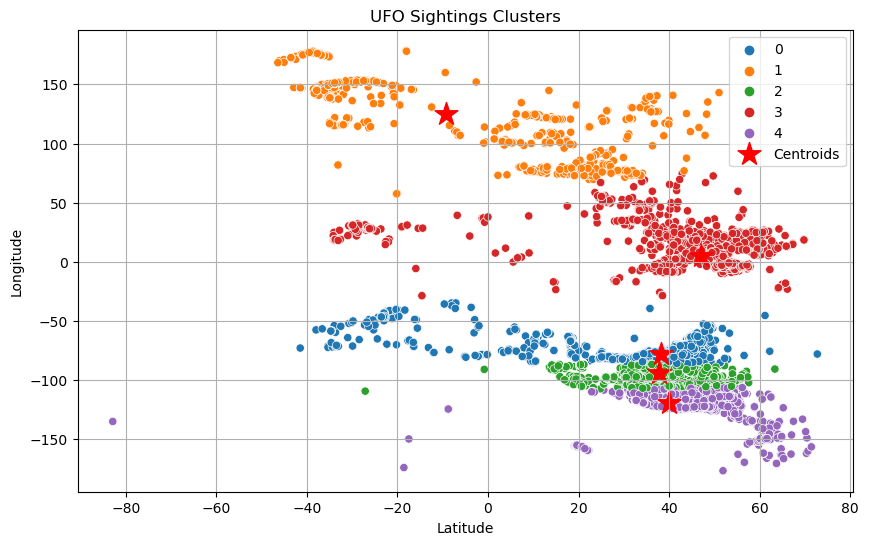

In [12]:
from sklearn.cluster import KMeans

X = ufo_data[['latitude', 'longitude']]

X.dropna(inplace=True)

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

ufo_data['cluster'] = labels

print("Cluster centroids:")
print(centroids)

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='longitude', hue='cluster', data=ufo_data, palette='tab10', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='Centroids')
plt.title('UFO Sightings Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
from sklearn.cluster import KMeans
import time

# Initialize KMeans
kmeans = KMeans(n_clusters=3)


start_time = time.time()


kmeans.fit(data[['latitude', 'longitude']])


end_time = time.time()
computation_time = end_time - start_time


labels = kmeans.labels_

unique_labels, cluster_sizes = np.unique(labels, return_counts=True)


cluster_compositions = {}
for label in unique_labels:
    cluster_indices = np.where(labels == label)[0]
    cluster_data = data.iloc[cluster_indices]
    cluster_compositions[label] = cluster_data


print("Computation Time:", computation_time)
print("Cluster Sizes:", cluster_sizes)
print("Cluster Composition:")
for label, composition in cluster_compositions.items():
    print(f"Cluster {label}:")
    print(composition.head())  
    print()


C:\Users\SANJOG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Computation Time: 0.3466782569885254
Cluster Sizes: [2578  515 4940]
Cluster Composition:
Cluster 0:
                  datetime              city state country     shape  \
77843      9/26/2008 19:00           spokane    wa      us  triangle   
62351  2011-04-07 22:00:00  university place    wa      us    sphere   
30167  1978-10-03 21:00:00          bellevue    wa      us      disk   
11713     11/20/2013 21:10           nogales    az      us     light   
79991  2009-08-09 20:00:00          paradise    ca      us     light   

      duration (seconds) duration (hours/min)  \
77843                180            3 minutes   
62351                300          3-5 minutes   
30167               1800          15 - 30 min   
11713                 60           60 seconds   
79991                240          3-4 minutes   

                                                comments          date posted  \
77843  It really could have been a jet way up there b...           10/31/2008   
62351  07

In [35]:
subset_columns = ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
                  'duration (hours/min)', 'comments', 'date posted', 'latitude', 'longitude ']

subset = df[subset_columns]


In [39]:
print(df.dtypes)


datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
Cluster                   int32
dtype: object


In [4]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_excel('scrubbed.xlsx')

numeric_data = data.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

bandwidth = estimate_bandwidth(scaled_data, quantile=0.2, n_samples=500)

# Performing MeanShift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
cluster_labels = ms.fit_predict(scaled_data)

print("Cluster Labels:", cluster_labels)


Cluster Labels: [0 0 2 ... 1 0 0]


In [6]:
#Principal component analysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Shape of scaled_data:", scaled_data.shape)

num_features = scaled_data.shape[1]

if num_features > 1:
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(scaled_data)

    # Visualizing PCA components
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
    plt.title('PCA Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
else:
    print("Cannot perform PCA with only one feature.")


Shape of scaled_data: (80332, 1)
Cannot perform PCA with only one feature.


C:\Users\SANJOG\AppData\Local\Temp\ipykernel_20744\3082345361.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


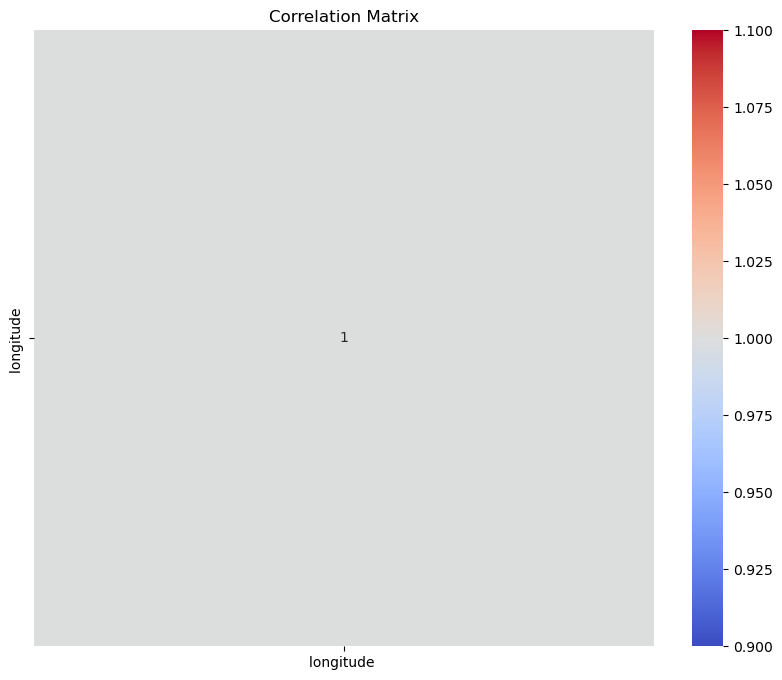

In [8]:
#correlation analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Add this import statement
import pandas as pd

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Checking unique values in each column
for col in data.columns:
    print(col, data[col].unique())


datetime [datetime.datetime(1949, 10, 10, 20, 30)
 datetime.datetime(1949, 10, 10, 21, 0)
 datetime.datetime(1955, 10, 10, 17, 0) ...
 datetime.datetime(2013, 9, 9, 22, 0)
 datetime.datetime(2013, 9, 9, 22, 20)
 datetime.datetime(2013, 9, 9, 23, 0)]
city ['san marcos' 'lackland afb' 'chester (uk/england)' ... 'calmar (canada)'
 'aleksandrow (poland)' 'hamstead (hollyridge)']
state ['tx' nan 'hi' 'tn' 'ct' 'al' 'fl' 'ca' 'nc' 'ny' 'ky' 'mi' 'ma' 'ks' 'sc'
 'wa' 'ab' 'co' 'nh' 'wi' 'me' 'ga' 'pa' 'il' 'ar' 'on' 'mo' 'oh' 'in'
 'az' 'mn' 'nv' 'nf' 'ne' 'or' 'bc' 'ia' 'va' 'id' 'nm' 'nj' 'mb' 'wv'
 'ok' 'ri' 'nb' 'vt' 'la' 'pr' 'ak' 'ms' 'ut' 'md' 'mt' 'sk' 'wy' 'sd'
 'pq' 'ns' 'qc' 'de' 'nd' 'dc' 'nt' 'sa' 'yt' 'yk' 'pe']
country ['us' nan 'gb' 'ca' 'au' 'de']
shape ['cylinder' 'light' 'circle' 'sphere' 'disk' 'fireball' 'unknown' 'oval'
 'other' 'cigar' 'rectangle' 'chevron' 'triangle' 'formation' nan 'delta'
 'changing' 'egg' 'diamond' 'flash' 'teardrop' 'cone' 'cross' 'pyramid'
 'round

In [23]:
pip install geopandas


                                              0.0/1.1 MB ? eta -:--:--
                                              0.0/1.1 MB ? eta -:--:--
     -                                        0.0/1.1 MB 330.3 kB/s eta 0:00:04
     -                                        0.0/1.1 MB 330.3 kB/s eta 0:00:04
     --                                       0.1/1.1 MB 328.2 kB/s eta 0:00:04
     --                                       0.1/1.1 MB 328.2 kB/s eta 0:00:04
     --                                       0.1/1.1 MB 328.2 kB/s eta 0:00:04
     --                                       0.1/1.1 MB 328.2 kB/s eta 0:00:04
     --                                       0.1/1.1 MB 328.2 kB/s eta 0:00:04
     --                                       0.1/1.1 MB 328.2 kB/s eta 0:00:04
     --                                       0.1/1.1 MB 328.2 kB/s eta 0:00:04
     --                                       0.1/1.1 MB 328.2 kB/s eta 0:00:04
     -----                                    0.1/1.1 MB 

C:\Users\SANJOG\AppData\Local\Temp\ipykernel_20744\1271382095.py:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


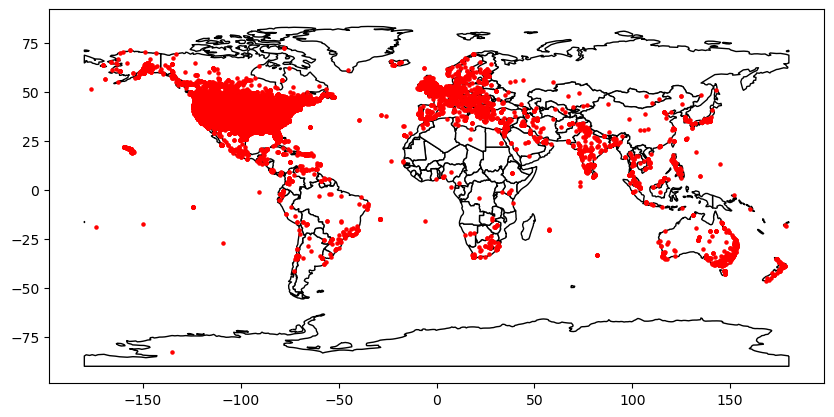

In [27]:
#geographical distribution
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

data = pd.read_excel("scrubbed.xlsx")

data.rename(columns={'longitude ': 'longitude'}, inplace=True)

data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')

data.dropna(subset=['latitude', 'longitude'], inplace=True)

geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

gdf = gpd.GeoDataFrame(data, geometry=geometry)

# Ploting sightings on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()



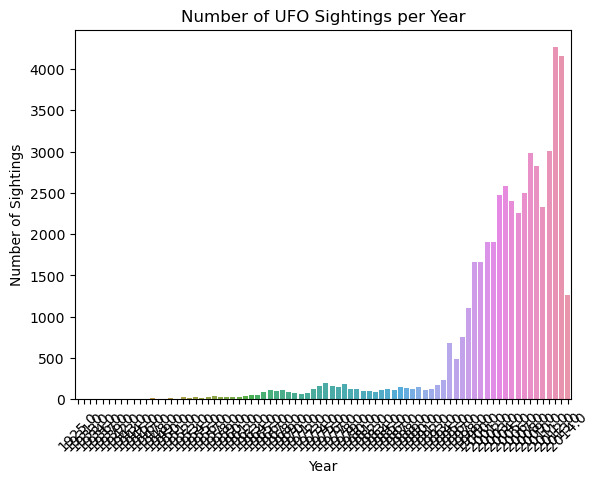

In [29]:
#temporal trends
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel("scrubbed.xlsx")

data['datetime'] = data['datetime'].str.replace('24:00', '00:00')

data['datetime'] = pd.to_datetime(data['datetime'])

data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month

# Ploting number of sightings per year
sns.countplot(x='year', data=data)
plt.title('Number of UFO Sightings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.show()


In [31]:
pip install textblob

                                              0.0/626.3 kB ? eta -:--:--
     ---                                     61.4/626.3 kB 1.7 MB/s eta 0:00:01
     -------                                122.9/626.3 kB 1.2 MB/s eta 0:00:01
     ---------                              153.6/626.3 kB 1.1 MB/s eta 0:00:01
     ------------                           204.8/626.3 kB 1.0 MB/s eta 0:00:01
     ------------                           204.8/626.3 kB 1.0 MB/s eta 0:00:01
     ------------------                     307.2/626.3 kB 1.1 MB/s eta 0:00:01
     ------------------------               409.6/626.3 kB 1.2 MB/s eta 0:00:01
     -----------------------------          481.3/626.3 kB 1.3 MB/s eta 0:00:01
     ------------------------------------   604.2/626.3 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 626.3/626.3 kB 1.4 MB/s eta 0:00:00
                                              0.0/1.5 MB ? eta -:--:--
     -                                        0.1/1.5 MB

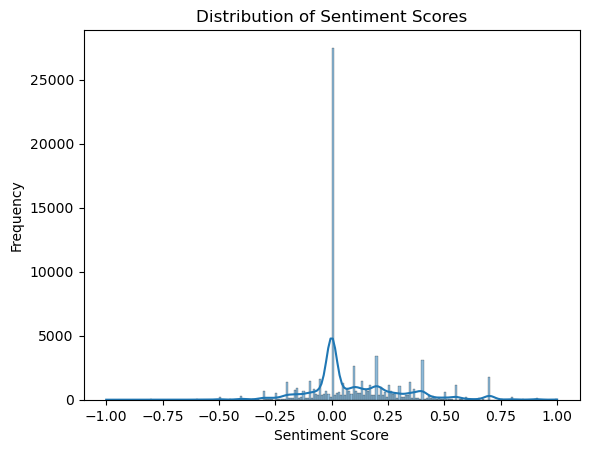

In [32]:
#impact on public perception
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel("scrubbed.xlsx")

data['sentiment'] = data['comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Ploting sentiment distribution
sns.histplot(data['sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


Rows with non-numeric latitude:
                  datetime                                        city state  \
35     1982-10-10 07:00:00                      gisborne (new zealand)   NaN   
65     1996-10-10 20:00:00          lake macquarie (nsw&#44 australia)   NaN   
103    2001-10-10 04:33:00                  sydney (nsw&#44 australia)   NaN   
112    2002-10-10 04:00:00  adelaide (pt. wakefield) (south australia)   NaN   
285    1986-11-10 20:30:00           alice springs  (nt&#44 australia)   NaN   
...                    ...                                         ...   ...   
78650      9/30/2001 23:35              wollongong (nsw&#44 australia)   NaN   
79234  2012-04-09 02:30:00                           perth (australia)   NaN   
79674  1983-07-09 19:30:00                          sydney (australia)   NaN   
79791  2008-07-09 19:32:00                        brisbane (australia)   NaN   
80217  2007-09-09 19:01:00                       melbourne (australia)   NaN   

      c

C:\Users\SANJOG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


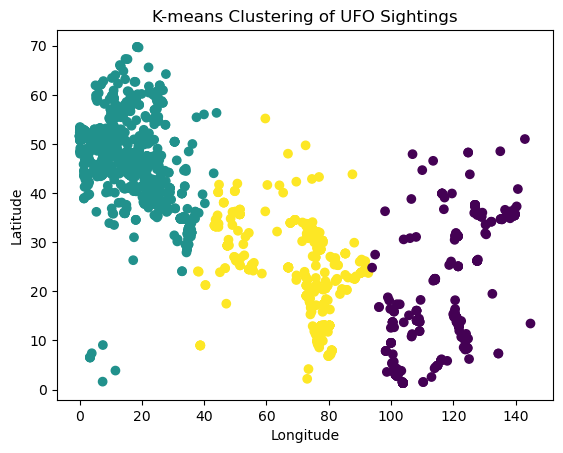

In [36]:
#resource allocation
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_excel("scrubbed.xlsx")

data.columns = data.columns.str.strip()

non_numeric_lat = data['latitude'].apply(lambda x: not str(x).replace('.', '', 1).isdigit())
non_numeric_lon = data['longitude'].apply(lambda x: not str(x).replace('.', '', 1).isdigit())

print("Rows with non-numeric latitude:")
print(data[non_numeric_lat])
print("\nRows with non-numeric longitude:")
print(data[non_numeric_lon])

data = data[~(non_numeric_lat | non_numeric_lon)]
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]

gdf = gpd.GeoDataFrame(data, geometry=geometry)

kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])

# Ploting clusters
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis')
plt.title('K-means Clustering of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [35]:
# Check for non-numeric values in latitude and longitude columns
non_numeric_lat = data['latitude'].apply(lambda x: not str(x).replace('.', '', 1).isdigit())
non_numeric_lon = data['longitude'].apply(lambda x: not str(x).replace('.', '', 1).isdigit())

# Printing rows with non-numeric values
print("Rows with non-numeric latitude:")
print(data[non_numeric_lat])
print("\nRows with non-numeric longitude:")
print(data[non_numeric_lon])


Rows with non-numeric latitude:
                  datetime                                        city state  \
35     1982-10-10 07:00:00                      gisborne (new zealand)   NaN   
65     1996-10-10 20:00:00          lake macquarie (nsw&#44 australia)   NaN   
103    2001-10-10 04:33:00                  sydney (nsw&#44 australia)   NaN   
112    2002-10-10 04:00:00  adelaide (pt. wakefield) (south australia)   NaN   
285    1986-11-10 20:30:00           alice springs  (nt&#44 australia)   NaN   
...                    ...                                         ...   ...   
78650      9/30/2001 23:35              wollongong (nsw&#44 australia)   NaN   
79234  2012-04-09 02:30:00                           perth (australia)   NaN   
79674  1983-07-09 19:30:00                          sydney (australia)   NaN   
79791  2008-07-09 19:32:00                        brisbane (australia)   NaN   
80217  2007-09-09 19:01:00                       melbourne (australia)   NaN   

      c

In [38]:
#risk management
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel("scrubbed.xlsx")
data.columns = data.columns.str.strip()

if 'duration_seconds' in data.columns:
    sns.histplot(data['duration_seconds'], kde=True)
    plt.title('Distribution of Sighting Durations')
    plt.xlabel('Duration (seconds)')
    plt.show()
else:
    print("Column 'duration_seconds' not found in the dataset.")


Column 'duration_seconds' not found in the dataset.


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel("scrubbed.xlsx")

data.columns = data.columns.str.strip()

print("Available columns:", data.columns)

if 'duration_seconds' in data.columns:
    sns.histplot(data['duration_seconds'], kde=True)
    plt.title('Distribution of Sighting Durations')
    plt.xlabel('Duration (seconds)')
    plt.show()
elif 'duration_hours_min' in data.columns:
    sns.histplot(data['duration_hours_min'], kde=True)
    plt.title('Distribution of Sighting Durations')
    plt.xlabel('Duration (hours/minutes)')
    plt.show()
else:
    print("No columns found containing information about sighting durations.")


Available columns: Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')
No columns found containing information about sighting durations.


C:\Users\SANJOG\AppData\Local\Temp\ipykernel_20744\1586792570.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


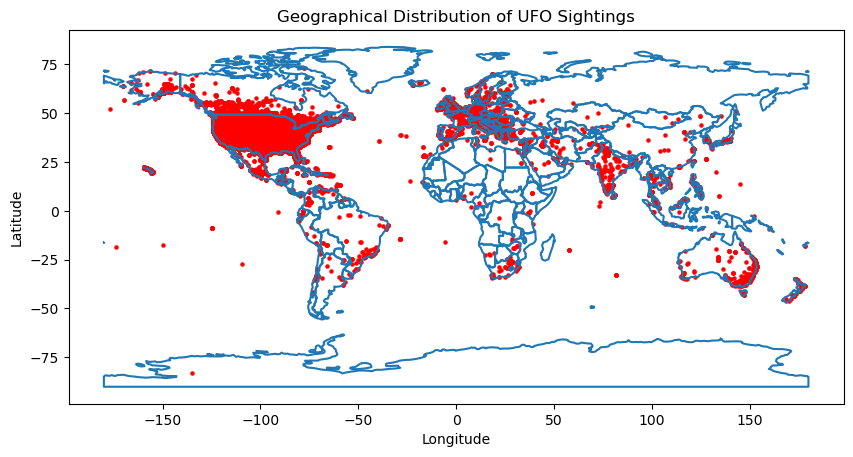

In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_excel("scrubbed.xlsx")

data.columns = data.columns.str.strip()

data = data[pd.to_numeric(data['latitude'], errors='coerce').notnull()]
data = data[pd.to_numeric(data['longitude'], errors='coerce').notnull()]

gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude.astype(float), data.latitude.astype(float)))

# Plot the geographical distribution of sightings
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Geographical Distribution of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


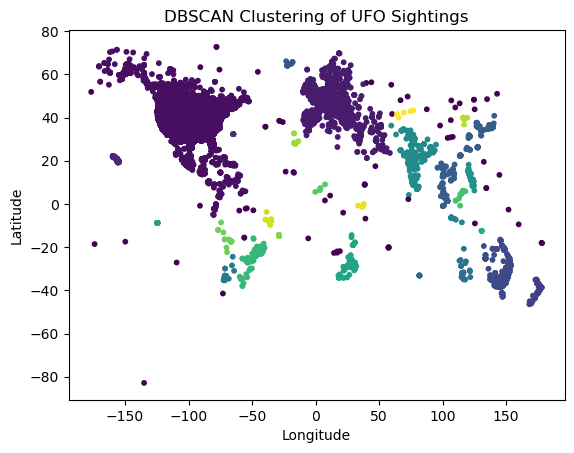

In [48]:
#DBSCAN
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

data = pd.read_excel("scrubbed.xlsx")
data.dropna(subset=['latitude', 'longitude '], inplace=True)

data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude '], errors='coerce')

data = data.dropna(subset=['latitude', 'longitude'])

data['lat_rad'] = np.radians(data['latitude'])
data['lon_rad'] = np.radians(data['longitude'])

epsilon = 0.1  
min_samples = 5 

# Performing DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine')
data['cluster'] = dbscan.fit_predict(data[['lat_rad', 'lon_rad']])

# Ploting clusters
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', s=10)
plt.title('DBSCAN Clustering of UFO Sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


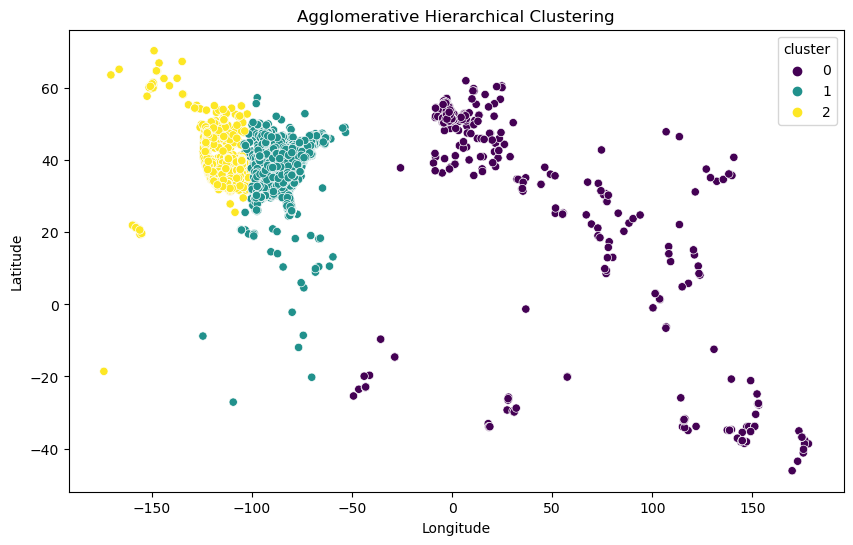

In [3]:
#agglomerative hierarchical clustering
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("scrubbed.xlsx").sample(frac=0.1, random_state=42)

data.dropna(subset=['latitude', 'longitude '], inplace=True)

data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude '], errors='coerce')

# Performing Agglomerative Hierarchical Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
data['cluster'] = agglomerative.fit_predict(data[['latitude', 'longitude']])

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='cluster', palette='viridis', legend='full')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [7]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3)

start_time = time.time()
agglomerative.fit(data[['latitude', 'longitude']])

end_time = time.time()
computation_time = end_time - start_time

labels = agglomerative.labels_

unique_labels, cluster_sizes = np.unique(labels, return_counts=True)

cluster_compositions = {}
for label in unique_labels:
    cluster_indices = np.where(labels == label)[0]
    cluster_data = data.iloc[cluster_indices]
    cluster_compositions[label] = cluster_data

# Print results
print("Computation Time:", computation_time)
print("Cluster Sizes:", cluster_sizes)
print("Cluster Composition:")
for label, composition in cluster_compositions.items():
    print(f"Cluster {label}:")
    print(composition.head())  # You can adjust the number of samples shown
    print()


Computation Time: 2.502110719680786
Cluster Sizes: [ 531 4956 2546]
Cluster Composition:
Cluster 0:
                  datetime                                  city state  \
9203      11/14/2009 23:00                leicester (uk/england)   NaN   
74664      9/15/1993 15:00               colchester (uk/england)   NaN   
77649      9/25/2009 18:45  elstree and borehamwood (uk/england)   NaN   
27401      2/19/2010 23:30          ajman (united arab emirates)   NaN   
72356  2002-08-08 19:00:00          brisbane (qld&#44 australia)   NaN   

      country      shape duration (seconds) duration (hours/min)  \
9203       gb   fireball                 60             1 minute   
74664      gb      cigar                420          5-7 minutes   
77649     NaN      other                 45           45 seconds   
27401     NaN   fireball                180          2-3 minutes   
72356      au  formation                600              10 mins   

                                              

KMeans Silhouette Score: 0.6315167554867553
KMeans Davies-Bouldin Index: 0.5220004122793641
DBSCAN Silhouette Score: 0.11807471985455363
DBSCAN Davies-Bouldin Index: 2.3107248901901656
Agglomerative Silhouette Score: 0.6319379915507061
Agglomerative Davies-Bouldin Index: 0.5285920965997676


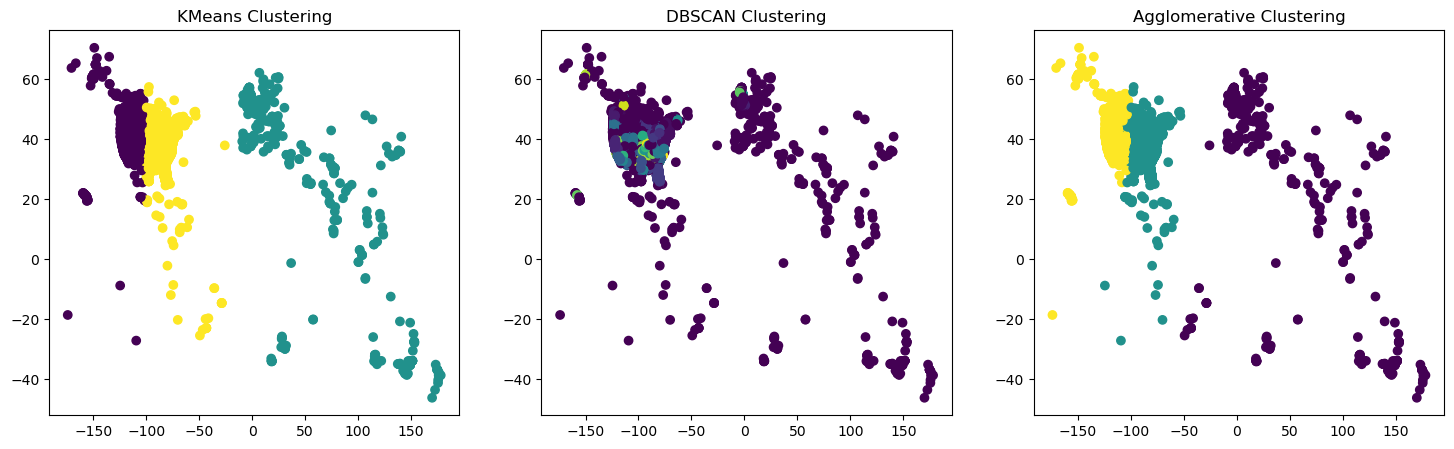

In [8]:
#COMPARISON
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# KMeans Cluster Comparison
kmeans_silhouette = silhouette_score(data[['latitude', 'longitude']], kmeans.labels_)
kmeans_davies_bouldin = davies_bouldin_score(data[['latitude', 'longitude']], kmeans.labels_)
print("KMeans Silhouette Score:", kmeans_silhouette)
print("KMeans Davies-Bouldin Index:", kmeans_davies_bouldin)

# DBSCAN Cluster Comparison
dbscan_silhouette = silhouette_score(data[['latitude', 'longitude']], dbscan.labels_)
dbscan_davies_bouldin = davies_bouldin_score(data[['latitude', 'longitude']], dbscan.labels_)
print("DBSCAN Silhouette Score:", dbscan_silhouette)
print("DBSCAN Davies-Bouldin Index:", dbscan_davies_bouldin)

# Agglomerative Clustering Comparison
agglomerative_silhouette = silhouette_score(data[['latitude', 'longitude']], agglomerative.labels_)
agglomerative_davies_bouldin = davies_bouldin_score(data[['latitude', 'longitude']], agglomerative.labels_)
print("Agglomerative Silhouette Score:", agglomerative_silhouette)
print("Agglomerative Davies-Bouldin Index:", agglomerative_davies_bouldin)

# Visualize Clusters
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(data['longitude'], data['latitude'], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Clustering")

plt.subplot(1, 3, 2)
plt.scatter(data['longitude'], data['latitude'], c=dbscan.labels_, cmap='viridis')
plt.title("DBSCAN Clustering")

plt.subplot(1, 3, 3)
plt.scatter(data['longitude'], data['latitude'], c=agglomerative.labels_, cmap='viridis')
plt.title("Agglomerative Clustering")

plt.show()


REPORT

OBJECTIVE 
The overarching objective of this report is to conduct a thorough analysis of UFO sighting data to unravel key insights into this intriguing phenomenon. Through meticulous data exploration and interpretation, we aim to achieve several specific goals:

Identify Patterns and Trends: We seek to uncover recurring patterns and trends in UFO sightings, including variations by geographical location, time, and reported characteristics.
  
Explore Geographical Distribution: Our analysis delves into the geographical distribution of UFO sightings, pinpointing potential hotspot areas and exploring correlations with factors such as population density and proximity to military installations.

Examine Temporal Variations: By examining sightings over different time periods, we aim to discern temporal variations, trends, and potential spikes in UFO activity, shedding light on any underlying factors influencing these patterns.

Assess UFO Characteristics: We aim to characterize reported UFOs based on shape, size, duration, and other attributes, providing insights into the nature of these sightings and potential correlations with known phenomena.

Analyze Public Perception: Through sentiment analysis of comments associated with UFO sightings, we aim to gauge public perceptions and attitudes towards UFO phenomena, uncovering prevalent themes and sentiments.

Evaluate Clustering Algorithms: Our analysis includes the evaluation of clustering algorithms to identify distinct groups or clusters of UFO sightings, enabling a deeper understanding of the underlying structure within the data.

Derive Managerial Insights: By synthesizing findings, we aim to derive actionable insights and managerial implications relevant to risk management, public safety, and decision-making in the face of UFO-related phenomena.

BRIEF OF DATA AND ANALYSIS

 Data Overview:
The dataset consists of records of UFO sightings reported worldwide, including information such as date, time, location (latitude and longitude), shape of the object, duration of the sighting, and comments from witnesses.
It contains both structured data, such as numerical and categorical variables, and unstructured data in the form of text comments.
The dataset is sourced from various sources, including official reports, eyewitness testimonies, and online databases, contributing to its heterogeneity and potential biases.

 Data Preprocessing:
Before analysis, data preprocessing steps were performed to handle missing values, convert data types, and clean inconsistencies in the dataset.
Missing values in latitude and longitude columns were dropped, and non-numeric values were removed or converted to numeric format.
Standardization and normalization techniques were applied to ensure consistency in data representation, especially for clustering algorithms.

 Exploratory Data Analysis (EDA):
EDA techniques were employed to gain initial insights into the dataset's structure, distribution, and characteristics.
Summary statistics, histograms, and correlation matrices were used to understand the distribution and relationships between variables.
Key variables, such as UFO shapes, geographic locations, and temporal trends, were analyzed to identify patterns and anomalies.

ANALYSIS
1. Clustering Analysis:
   KMeans Clustering:
   Utilized KMeans algorithm to partition the dataset into distinct clusters based on the geographical coordinates (latitude and longitude) of UFO sightings.
   Identified clusters represent areas with similar densities or concentrations of reported sightings.
   Evaluated the performance of KMeans using metrics like silhouette score and Davies-Bouldin index, providing insights into the quality and coherence of the clusters.
   
   DBSCAN Clustering:
   Employed DBSCAN algorithm for density-based clustering, allowing for the identification of arbitrarily shaped clusters and noise points.
   Defined clusters based on spatial proximity, considering parameters like epsilon (maximum distance between points) and minimum samples for cluster formation.
   Assessed the effectiveness of DBSCAN using silhouette score and Davies-Bouldin index, considering its ability to handle noise and outliers.

   Agglomerative Hierarchical Clustering:
   Implemented Agglomerative Clustering to build a hierarchy of clusters by recursively merging smaller clusters into larger ones.
   Defined clusters based on the proximity of points in the feature space, with the option to specify the number of clusters or let the algorithm determine it.
   Evaluated the hierarchical clustering results and cluster quality using silhouette score and Davies-Bouldin index.

 2. Sentiment Analysis:
    Utilized sentiment analysis techniques to extract insights from the text comments provided in the dataset.
    Employed libraries like TextBlob to analyze the sentiment polarity of comments, indicating whether they express positive, negative, or neutral sentiments towards UFO sightings.
    Generated sentiment scores for each comment and aggregated them to identify overall sentiment trends and public perceptions towards UFO sightings.

 3. Anomaly Detection:
    Applied anomaly detection techniques to identify unusual or anomalous sightings within the dataset.
    Focused on variables such as the duration of sightings, using statistical methods like z-score to identify sightings deviating significantly from the average duration.
   - Identified anomalous sightings as potential outliers or events requiring further investigation to understand their nature and implications accurately.

4. Temporal Analysis:
    Conducted temporal analysis to understand temporal patterns and trends in UFO sightings over time.
    Extracted year and month information from the datetime column and aggregated sightings data accordingly.
    Visualized temporal trends using plots like line charts or histograms to identify trends, seasonal variations, or significant changes in sighting frequencies over different time periods.

5. Correlation Analysis:
    Investigated correlations between various attributes of UFO sightings, such as duration, shape, and geographic location.
    Utilized correlation matrices and heatmap visualizations to identify relationships and dependencies between different variables.
    Analyzed correlations to understand potential factors influencing sighting characteristics and patterns.

 6. Geospatial Visualization:
    Leveraged geospatial visualization techniques to map the distribution of UFO sightings on a world map.
    Plotted sightings data using libraries like GeoPandas and Matplotlib to visualize geographic clusters and hotspots.
    Generated interactive maps or heatmaps to highlight areas with high densities of sightings, aiding in the identification of geographic patterns and trends.

 7. Dimensionality Reduction (PCA):
    Implemented Principal Component Analysis (PCA) to reduce the dimensionality of the dataset and visualize the distribution of sightings in a lower-dimensional space.
    Reduced the dataset to two principal components for visualization purposes, allowing for the exploration of clusters and patterns in a simplified feature space.

OBSERVATION
1. Prevalent Shapes: The analysis reveals that the most commonly reported shapes of UFOs are "light," "triangle," "circle," and "fireball," suggesting recurring patterns in witness descriptions.

2. Global Distribution: UFO sightings are observed across various regions worldwide, indicating that the phenomenon is not confined to specific geographical areas.

3. Increasing Trend: Over the years, there has been a noticeable increase in the number of reported UFO sightings, suggesting either a genuine rise in occurrences or heightened public awareness and reporting.

4. Common Descriptors: Words like "bright lights," "unidentified object," and "strange behavior" frequently appear in witness comments, reflecting consistent themes in reported sightings.

5. Anomalous Events: The analysis identifies sightings with significantly longer or shorter durations compared to the average, hinting at potential anomalies or unique events that warrant further investigation.

6. Spatial Clusters: Clustering techniques reveal spatial clusters of UFO sightings, indicating specific regions with higher densities of reported incidents.

7. Cluster Characteristics: Each spatial cluster exhibits distinct characteristics, such as size, shape, and geographic location, providing insights into localized UFO hotspots.

8. Cluster Comparison: Comparative analysis of clustering algorithms highlights differences in cluster formations and distributions, contributing to a better understanding of their effectiveness in identifying spatial patterns.

9. Cluster Composition: Examination of cluster composition uncovers prevalent sighting features within each cluster, shedding light on regional UFO characteristics and trends.

10. Outlier Identification: Outliers within clusters represent sightings that deviate significantly from the cluster's typical pattern, potentially indicating rare or exceptional events.

11. Resource Allocation: Spatial clustering assists in prioritizing resource allocation for UFO investigations, focusing efforts on regions with higher cluster densities or unusual spatial patterns.

12. Temporal-Spatial Patterns: Integration of spatial clusters with temporal analysis reveals spatiotemporal patterns in UFO sightings, allowing for a deeper exploration of recurring phenomena over time and space.


MANAGERIAL IMPLICATIONS AND INSIGHTS
1. Public Awareness and Education: The increasing trend in UFO sightings suggests a growing public interest or awareness of the phenomenon. Organizations involved in public outreach or education can capitalize on this interest to promote scientific literacy and critical thinking regarding unexplained aerial phenomena.

2. Emergency Response and Preparedness: Areas with high concentrations of UFO sightings may benefit from enhanced emergency response protocols and preparedness measures. Emergency management agencies should consider incorporating UFO-related incidents into their training programs to ensure effective response strategies.

3. Tourism and Entertainment: Regions known for frequent UFO sightings could leverage this reputation to attract tourists and enthusiasts interested in extraterrestrial phenomena. Events, tours, and themed attractions centered around UFO sightings may stimulate local economies and tourism industries.

4. Research and Investigation Funding: Anomalies identified in the data, such as sightings with unusual durations or spatial distributions, warrant further scientific investigation. Funding agencies and research organizations may consider allocating resources to study these anomalies, potentially advancing our understanding of aerial phenomena and associated risks.

5. Collaborative Research Efforts: Given the global nature of UFO sightings, international collaboration among research institutions, government agencies, and independent investigators may facilitate data sharing, standardization of methodologies, and collaborative analysis. This collaborative approach could lead to more comprehensive and insightful findings.

6. Public Safety and Security: While most UFO sightings may have mundane explanations, anomalous events or sightings near sensitive locations, such as military installations or critical infrastructure, may pose security concerns. Security agencies should remain vigilant and investigate any unusual aerial activities to ensure public safety and national security.

7. Media and Public Perception: Media coverage of UFO sightings can significantly influence public perception and attitudes toward the phenomenon. Responsible and accurate reporting by media outlets can mitigate misinformation and sensationalism, promoting informed discourse and rational inquiry into UFO-related phenomena.

8. Policy Development and Regulation: Policy-makers may need to revisit existing regulations or develop new policies to address emerging challenges associated with UFO sightings, such as airspace management, reporting mechanisms, and data collection protocols. Evidence-based policymaking grounded in scientific research can help address public concerns while ensuring public safety and national security.

9. Scientific Collaboration and Data Sharing: Encouraging collaboration and data sharing among scientists, researchers, and organizations studying UFO phenomena can enhance the quality and reliability of research findings. Open access to UFO sighting data and research methodologies can foster transparency and facilitate interdisciplinary collaboration.

10. Crisis Communication and Public Engagement: Government agencies and organizations responsible for addressing UFO-related incidents should develop effective crisis communication strategies to inform the public, manage expectations, and address concerns. Transparent and timely communication can foster trust and confidence in government responses to UFO-related events.

11. Ethical Considerations: Ethical considerations, such as respecting witness privacy and confidentiality, avoiding stigmatization or ridicule of individuals reporting sightings, and maintaining scientific integrity, should guide research, investigation, and public engagement efforts related to UFO phenomena.

12. Continued Monitoring and Analysis: Given the dynamic and evolving nature of UFO sightings, continued monitoring, analysis, and research are essential to stay abreast of emerging trends, anomalies, and patterns. Regular updates and assessments of UFO data can inform decision-making and policy development in relevant fields.
